# Logistic Regression

Logistic regression is like linear regression, but for classification problems. It produces a line, but the line is used to separate data between two categories of some sort, which requires a slightly different approach internally.

### Fabricate Dataset

Fabricate some data that illustrates two categories of vehicles speeds: "slow" and "fast", and plot each point against two axes, one representing the distance to an upcoming bump in the road, and the other the size of the bump. In theory, cars should slow down when approaching a large bump, and slow down more the closer you get to it. 

Use scikit-learn's "make_blobs" function to create a couple of clusters of each category ("fast" and "slow") near the corners of the graph.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.datasets import make_blobs

n_samples = 10000

# Generate fabricated dataset (create two blobs of randomly distributed data at two corners of the graph)
centers = [(0.9, 0.05), (0.05, 0.94)]
x, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=0.4,
                  centers=centers, shuffle=False, random_state=42)

# Filter out only the values that lie within [0,1]:
features = []
labels = []
for feature, label in zip(x, y):
    if (feature[0] >= 0 and feature[0] <= 1.0 and feature[1] >= 0 and feature[1] <= 1.0):
        features.append(feature)
        labels.append(label)

# Convert the results back into numpy arrays:
x = np.array(features)
y = np.array(labels)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


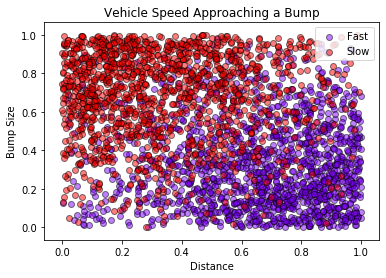

In [8]:
# Visualize the fabricated dataset:

plt.figure()
y_unique = np.unique(y)
class_names = ['Fast', 'Slow']
colors = cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
for this_y, color in zip(y_unique, colors):
    this_x = x[y == this_y]
    plt.scatter(this_x[:, 0], this_x[:, 1], c=color,
                alpha=0.5, edgecolor='k',
                label=class_names[this_y])
plt.legend(loc="best")
plt.xlabel('Distance')
plt.ylabel('Bump Size')
plt.title("Vehicle Speed Approaching a Bump")
plt.show()

### Create Model and Fit Data

In [9]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=1.0)

logreg.fit(x,y)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Visualize the Results

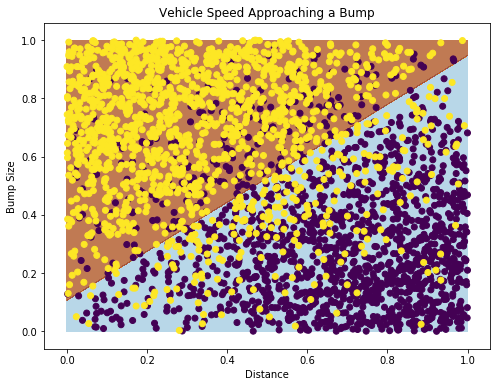

In [10]:
def plotPredictions(clf):
    xx, yy = np.meshgrid(np.arange(0, 1.0, 0.001),
                     np.arange(0, 1.0, 0.001))
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=(8, 6))
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(x[:,0], x[:,1], c=y.astype(np.float))
    plt.xlabel('Distance')
    plt.ylabel('Bump Size')
    plt.title("Vehicle Speed Approaching a Bump")
    plt.show()
    
plotPredictions(logreg)

### Train-Test-Split

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

logreg.fit(x_train, y_train)
logreg.score(x_test, y_test)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.839344262295082

### k-Fold Cross Validation

In [12]:
from sklearn.model_selection import cross_val_score

fold_scores = cross_val_score(logreg, x, y, cv=5)
print (fold_scores)
print (np.mean(fold_scores))

[0.86885246 0.84098361 0.8407225  0.82758621 0.83415435]
0.8424598239521925


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
